<a href="https://colab.research.google.com/github/khoatran02/Pytouch_basics/blob/main/Pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Pytoch?
Trong số những framework hỗ trợ deeplearning thì pytorch là một trong những framework được ưa chuộng nhiều nhất (cùng với tensorflow và keras), có lượng người dùng đông đảo, cộng đồng lớn mạnh. Vào năm 2019 framework này đã vươn lên vị trí thứ 2 về số lượng người dùng trong những framework hỗ trợ deeplearning (chỉ sau tensorflow). Đây là package sử dụng các thư viện của CUDA và C/C++ hỗ trợ các tính toán trên GPU nhằm gia tăng tốc độ xử lý của mô hình. 2 mục tiêu chủ đạo của package này hướng tới là:

* Thay thế kiến trúc của numpy để tính toán được trên GPU.
* Deep learning platform cung cấp các xử lý tốc độ và linh hoạt.

Trước khi đọc bài viết này, bạn đọc có thể ôn lại bài hướng dẫn về tensorflow deeplearning framework để tự rút ra được những so sánh về các đặc điểm chung và các ưu nhược điểm của 2 framework này.

Để sử dụng pytorch trên GPU bắt buộc các bạn phải cài CUDA và tất nhiên phải có GPU. Hướng dẫn cài đặt pytorch có thể xem tại pytorch install. Trên google colab thì thư viện này và tensorflow đã được tích hợp sẵn cho người dùng.

Bên dưới chúng ta cùng tìm hiểu:

* Định dạng tensor trên pytorch.
* Các toán tử trên torch tensor.
* Xây dựng một mô hình mạng nơ ron trên pytorch.

Bài viết này được mình tổng hợp và lược dịch từ bài viết Deeplearning with Pytorch: A 60 Minute Blitz có sự hiệu chỉnh và bổ sung về nội dung dựa trên kiến thức của mình.

##Tensor
Là dữ liệu nhiều chiều tương tự như ma trận trong numpy nhưng được thêm các tính chất để có thể hoạt động trên GPU nhằm gia tăng tốc độ tính toán. Các định dạng dữ liệu tensor của pytorch khá giống với tensorflow. Tuy nhiên trong quá trình khởi tạo chúng trên pytorch chúng ta không cần phải truyền code vào trong 1 session để tạo tensor như tensorflow. Qua các ví dụ bên dưới chúng ta sẽ cùng làm quen với các dạng tensor chính của pytorch.

In [ ]:
from __future__ import print_function
import torch

In [ ]:
# Create a empty matrix

x = torch.empty(5, 3)
print(x)

tensor([[2.5235e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 0.0000e+00]])


In [ ]:
# Create a ramdom matrix
x = torch.rand(5, 3)
print(x)

tensor([[0.7081, 0.0902, 0.2215],
        [0.8790, 0.2310, 0.4982],
        [0.7541, 0.2334, 0.9028],
        [0.1472, 0.3116, 0.9310],
        [0.8602, 0.6816, 0.9123]])


In [ ]:
# Initialize matrix 0 with data type long

x = torch.zeros(5, 3, dtype = torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [ ]:
# Create matrix from list
x = torch.tensor([[5, 3.5]])
print(x)

tensor([[5.0000, 3.5000]])


In [ ]:
# Initialize a matrix that has the same properties as an existing matrix.
# Such as shape. Unless the new attribute is included overriding the old one.
x = x.new_ones(5, 3, dtype = torch.double)
print(x)

x = torch.randn_like(x, dtype = torch.float) #override dtype
# The new matrix is randomly initialized with the same shape as the old one, the dtype is overridden.
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.0153, -0.9495, -0.0872],
        [ 1.8746, -1.5209, -0.2936],
        [ 0.2875, -0.4491,  0.0966],
        [ 1.4317, -1.5608, -0.3803],
        [-0.0740, -0.6192, -0.3721]])


In [ ]:
# get size
print(x.size())

torch.Size([5, 3])


##Operations
Có rất nhiều các operation trên pytorch như: cộng, trừ, nhân, chia, reshape, khởi tạo ngẫu nhiên. Chúng ta sẽ lần lượt tìm hiểu:

In [ ]:
# Khởi tạo ngẫu nhiên
x = torch.randn(3, 3)
print(x)
y = torch.ones(3, 3)
print(y)
print(x+y)

tensor([[ 0.3263,  2.7792,  0.5622],
        [-0.2882, -0.7631,  0.4283],
        [ 1.3758,  1.7474,  0.4240]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1.3263, 3.7792, 1.5622],
        [0.7118, 0.2369, 1.4283],
        [2.3758, 2.7474, 1.4240]])


In [ ]:
#Phép cộng
print(torch.add(x, y))


tensor([[1.3263, 3.7792, 1.5622],
        [0.7118, 0.2369, 1.4283],
        [2.3758, 2.7474, 1.4240]])


In [ ]:
#hoặc cũng có thể đưa kết quả vào một giá trị khởi tạo rỗng.
z = torch.empty(3,3)
torch.add(x, y, out = z)
print(z)

tensor([[1.3263, 3.7792, 1.5622],
        [0.7118, 0.2369, 1.4283],
        [2.3758, 2.7474, 1.4240]])


In [ ]:
#Phép trừ
print(torch.sub(x, y))

tensor([[-0.6737,  1.7792, -0.4378],
        [-1.2882, -1.7631, -0.5717],
        [ 0.3758,  0.7474, -0.5760]])


In [ ]:
x

tensor([[ 0.3263,  2.7792,  0.5622],
        [-0.2882, -0.7631,  0.4283],
        [ 1.3758,  1.7474,  0.4240]])

In [ ]:
#Truy cập index
# Truy cập cột thứ 2 của x
print(x[:, 1])

tensor([ 2.7792, -0.7631,  1.7474])


In [ ]:
#reshape tensor
#Để resize/reshape tensor ta sử dụng hàm view
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # Giá trị -1 cho biết kích thước của chiều này được tính theo các chiều còn lại

print(x.size(), y.size(), z.size())


torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [ ]:
x, y, z

(tensor([[-0.6312, -0.3604, -1.3026,  0.2811],
         [ 0.3489,  0.9498,  0.0349, -1.4136],
         [ 0.1149,  0.6726,  0.5205, -1.0145],
         [-1.4706, -0.8663, -1.3229,  2.4274]]),
 tensor([-0.6312, -0.3604, -1.3026,  0.2811,  0.3489,  0.9498,  0.0349, -1.4136,
          0.1149,  0.6726,  0.5205, -1.0145, -1.4706, -0.8663, -1.3229,  2.4274]),
 tensor([[-0.6312, -0.3604, -1.3026,  0.2811,  0.3489,  0.9498,  0.0349, -1.4136],
         [ 0.1149,  0.6726,  0.5205, -1.0145, -1.4706, -0.8663, -1.3229,  2.4274]]))

In [ ]:
# Chúng ta có thể chuyển tensor x có 1 phần tử sang 1 numeric python bằng hàm item().
x = torch.tensor([1.5])
i = x.item()
print(i)


1.5


##Connections with numpy
Chuyển đổi Torch tensor sang numpy array khá dễ dàng.

Torch tensor và numpy array sẽ sử dụng chung các địa chỉ ô nhớ khi torch tensor hoạt động trên CPU, do đó khi thay đổi giá trị này sẽ thay đổi giá trị kia. Gần giống như phép gán trong pandas nếu không sử dụng copy(). Bên dưới ta sẽ thử nghiệm khởi tạo a trên pytorch và b là giá trị numpy của tensor torch a. Thay đổi a và kiểm tra giá trị của b có bị thay đổi tương ứng không?

In [ ]:
# Chuyển đổi torch tensor sang numpy array
a = torch.ones(5)
print(a)
print(type(a))

b = a.numpy()
print(type(b))

tensor([1., 1., 1., 1., 1.])
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [ ]:
# Thêm 1 phần tử 1 vào a
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
# chuyển đổi numpy array sang torch tensor
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)

print(a)
print(b)
print(type(a))
print(type(b))

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


#CUDA tensor
là định dạng tensor nhưng được đưa lên device (có thể là cpu, cuda, mkldnn, opengl, …). Hỗ trợ các tính toán nhanh hơn nhờ kiến trúc CUDA. Để đưa 1 tensor lên một thiết bị bất kì ta sử dụng hàm to().

In [ ]:
# kiểm tra xem có tồn tại CUDA trên máy không. Lưu ý nếu đang sử dụng google colab, bạn phải bật GPU tại Runtime>change runtime type để enable CUDA.
if torch.cuda.is_available():
  device = torch.device("cuda") # Khởi tạo một cuda device object
  y = torch.ones_like(x, device = device) # Trực tiếp khởi tạo một tensor trên GPU
  x = x.to(device) # Truyền giá trị tensor vào thiết bị. Có thể truyền vào tên thiết bị: .to("cuda")
  z = x + y
  print(z)
  print(z.to("cpu", torch.double)) # Trong hàm .to() ta có thể thay định dạng dữ liệu.

tensor([2.5000], device='cuda:0')
tensor([2.5000], dtype=torch.float64)


##Autograd: Automatically calculate the derivative
Trung tâm của toàn bộ các mạng nơ ron hoạt động trên pytorch là autograd package. Hãy tìm hiểu về autograd trước khi thực sự xây dựng một mạng nơ ron trên pytorch.

Chức năng của autograd: Tự động tính toán đạo hàm trên toàn bộ các toán tử của tensors. Nó là một framework được định nghĩa trong quá trình chạy, có nghĩa rằng quá trình lan truyền ngược được xác định khi mà code được chạy, và do đó mỗi vòng lặp có thể có kết quả thay đổi tham số theo lan truyền ngược khác nhau.

Theo dõi lịch sử của tensor torch: torch.tensor là package khởi tạo các tensor torch. Mỗi một tensor torch sẽ có 1 thuộc tính là .requires_grad, nếu bạn set thuộc tính này về True, các toán tử triển khai trên tensor sẽ được theo dõi. Khi kết thúc quá trình lan truyền thuận (hoặc quá trình tính toán output) bạn có thể gọi .backward() và mọi tính toán gradient sẽ được tự động thực hiện dựa trên lịch sử đã được lưu lại. Các gradient cho tensor này sẽ được tích lũy và xem tại thuộc tính .grad.

Để dừng theo dõi một tensor chúng ta gọi vào hàm .detach(). Khi đó các hoạt động trên tensor sẽ không còn được lưu vết nữa.

Ngoài ra để ngăn tensor lưu lại lịch sử (và sử dụng memory), chúng ta cũng có thể bao quanh code block triển khai tensor với hàm with torch.no_grad(): nó rất hữu ích trong trường hợp đánh giá model bởi vì khi thuộc tính requires_grad = True thì model sẽ có thể được cập nhật tham số. Nhưng quá trình đánh giá model sẽ không cần cập nhật tham số nên chúng ta không cần áp dụng gradient lên chúng. Đơn giản là set requires_grad = False.

Bạn đọc tạm chấp nhận lý thuyết nêu trên, phần thực hành bên dưới sẽ giúp giải thích sáng tỏ.

Ngoài ra class Function cũng rất quan trọng trong thực hiện autograd.

Lưu trữ đồ thị tính toán:

2 class Tensor và Function cùng tương tác và xây dựng một đồ thị chu trình mà đồ thị này mã hóa lại toàn bộ lịch sử tính toán. Mỗi một tensor đều có 1 thuộc tính grad_fn trích dẫn đến một Function đã tạo ra Tensor (trừ trường hợp tensor được tạo ra bởi user được set thuộc tính grad_fn là None).

Nếu muốn tính toán đạo hàm chúng ta gọi vào hàm .backward() của Tensor. Nếu Tensor là một scalar sẽ không cần xác định bất kì đối số gradient nào cho .backward(). Tuy nhiên khi Tensor có nhiều hơn 1 phẩn tử cần xác định đối số gradient là một tensor có cùng kích thước. Đối số này sẽ qui định tốc độ thay đổi theo gradient tại mỗi chiều là bao nhiêu.

Ví dụ về lưu trữ đồ thị tính toán:

Bên dưới ta sẽ khởi tạo một tensor torch có khả năng theo dõi thay đổi theo 2 cách:



In [ ]:
# Cách 1: set requires_grad = True.
x = torch.ones(2, 2, requires_grad = True)
print(x)

y = x+2
print(y)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


Do tại x ta đã theo dõi thay đổi bằng các set tham số requires_grad = True nên các tính toán được thực hiện trên x sẽ được theo dõi lại ở thuộc tính grad_fn

In [ ]:
print(y.grad_fn)

Giá trị của grad_fn cho thấy ta đã thực hiện một phép cộng để thu được y. Thực hiện tiếp 1 biến đổi nữa sử dụng y.

In [ ]:
z = y * y * 3
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [ ]:
# Cách 2: Sử dụng inplace function.

Hoặc chúng ta có thể thiết lập requires_grad theo cách inplace. Mặc định của requires_grad khi khởi tạo 1 tensor torch là False tức là sẽ không ghi lại lịch sử thay đổi.

In [ ]:
a = torch.ones(3, 3)
print(a)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b)
print(b.grad_fn)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
False
True
tensor(9., grad_fn=<SumBackward0>)


##Gradients

Bây h ta sẽ thực hiện một lan truyền ngược (backprop) thông qua hàm out.backward().



In [ ]:
out.backward()

Kết quả của gradient d(out)/dx sẽ được lưu trong phần tử x.grad.



In [ ]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [ ]:
print(x.grad)


tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Chúng ta nhận được ma trận chỉ gồm các phần tử là 4.5. Đây chính là đạo hàm của mỗi phần tử của x theo y.

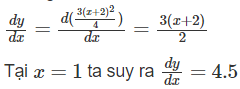


Hàm torch.autograd sẽ là hàm chức năng tính tích giữa vector và ma trận jacobian. Hàm số cho ta biết mức độ thay đổi của các chiều khi đi theo phương gradient.

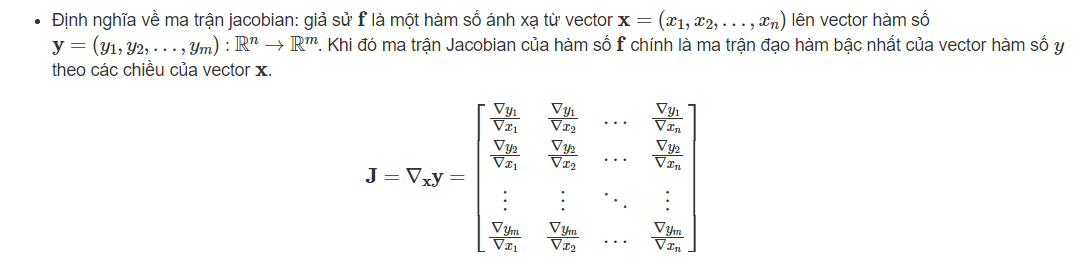

Cụ thể hơn chúng ta có thể tham khảo ở link sau: [Ma trận jacobian - wiki](https://vi.wikipedia.org/wiki/Ma_tr%E1%BA%ADn_Jacobi)

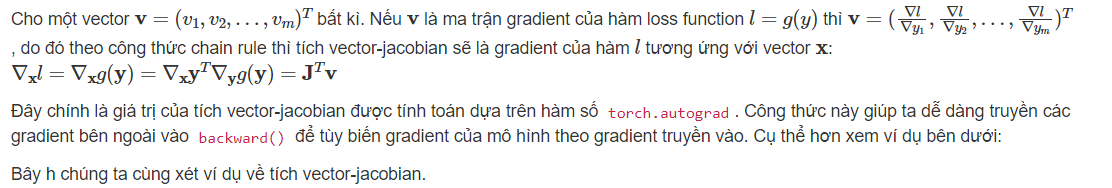

In [ ]:
import torch

x = torch.randn(3, requires_grad = True)
yhat = torch.randn(3, requires_grad = True)*2
y = x*2
l = ((y-yhat)**2).mean()
print(l)

tensor(10.1347, grad_fn=<MeanBackward0>)


In [ ]:
x, yhat, y, l

(tensor([-1.0458, -1.3357, -0.2641], requires_grad=True),
 tensor([-2.7929,  2.2440,  1.8701], grad_fn=<MulBackward0>),
 tensor([-2.0916, -2.6713, -0.5281], grad_fn=<MulBackward0>),
 tensor(10.1347, grad_fn=<MeanBackward0>))

Trong TH này y sẽ không còn là 1 scalar. Hàm torch.autograd sẽ không tính toán ma trận jacobian trực tiếp mà thay vào đó sẽ tính tích vector-jacobian theo vector v truyền vào đối số .backward().

In [ ]:
# Khởi tạo một vector gradient tự do v
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float)

In [ ]:
v

tensor([0.1000, 1.0000, 0.0010])

In [ ]:
# Tính ma trận Jacobian (đạo hàm của y theo v)
l.backward(v)
# Tính tích vector-jacobian chính là đạo hàm của 
print(x.grad)

tensor([0.2000, 2.0000, 0.0020])


Để dừng autograd theo dõi các thay đổi lịch sử trên tensor, chúng ta có thể thiết lập .requires_grad = True hoặc đặt các biến đổi tensor trong block code torch.no_grad().

In [ ]:
print(x.requires_grad)
print((x*x).requires_grad)
with torch.no_grad():
  print((x*x).requires_grad)

True
True
False


#Building a neural network

##CNN Network Architecture
Các mạng neural sẽ được xây dựng dựa trên package torch.nn. Dựa trên autograd model sẽ xác định đạo hàm bậc 1 theo các chiều dữ liệu. Một nn.Module sẽ bao gồm các layers và một phương thức forward(input) để trả ra kết quả output.

Xây dựng mạng neural network sẽ trả qua các bước sau:

* Xây dựng kiến trúc mạng nơ ron.
* Phân chia dữ liệu train, test.
* Xác định phương pháp optimization để cập nhật gradient descent và hàm loss function.
* Huấn luyện model.
* Hậu kiểm model.

Về convolution layer xem tại: [Convolution layer](https://www.kaggle.com/code/phamdinhkhanh/convolutional-neural-network-p1/notebook)

Tiếp theo chúng ta sẽ xây dựng kiến trúc mạng Lenet để phân biệt hình ảnh các đồ vật và loài vật. Sơ đồ kích thước các layers của mạng như bên dưới:

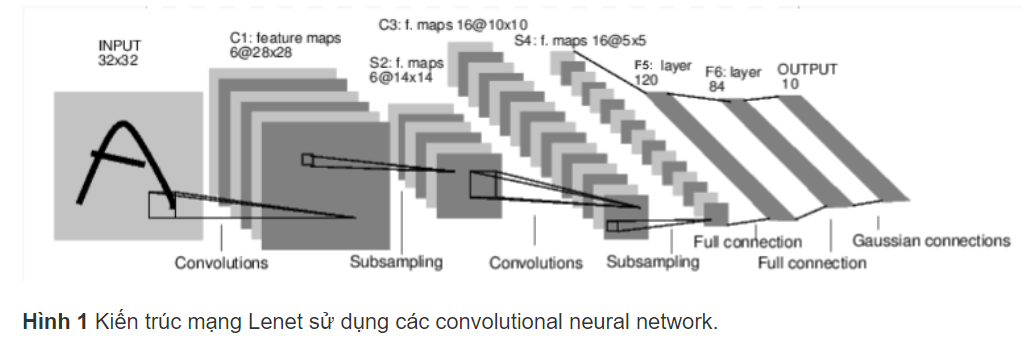

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # 1 input image channel, 6 output channels, 3x3 square convolution
    # kernel 
    # conv2d (input chanels, output chanels, kernel size)
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # Max pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # If the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Chúng ta phải xác định trước forward function để trả ra kết quả của model ở đầu ra. Dựa trên forward function, hàm backward function (là nơi mà gradients tại mỗi layers được tính toán) sẽ được tự động xác định khi bạn sử dụng autograd. Chúng ta cũng có thể sử dụng bất kì một phép biến đổi toán tử Tensor nào trên hàm forward function.

Các tham số huấn luyện (tham số mà có thể thay đổi được trong huấn luyện) của mô hình được trả về bằng hàm net.parameters().

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


Chúng ta thử nghiệm khởi tạo một đầu vào ngẫu nhiên 32x32. Chú ý rằng: Kì vọng đầu vào của mạng lenet là 32x32. Để sử dụng mạng này trên MNIST dataset chúng ta sẽ phải resize kích thước ảnh về 32x32.

In [ ]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0719,  0.0516,  0.0255, -0.0861, -0.1000, -0.0468,  0.0725,  0.0962,
          0.0954,  0.0810]], grad_fn=<AddmmBackward0>)


Khi đó kết quả đầu ra thu được là một tensor có 10 phần tử, mỗi phần tử tương ứng với điểm số được phân bố cho class mà nó thuộc về. Bên dưới chúng ta chuyển toàn bộ các gradients trong bộ nhớ đệm về 0 bằng hàm .zero_grad() và lan truyền ngược với gradients ngẫu nhiên.

In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

Lưu ý: torch.nn chỉ hỗ trợ các mini-batches. Toàn bộ torch.nn packages chỉ hỗ trợ đầu vào là mini-batch của mẫu (tức là luôn có 1 chiều trong shape qui định batch size), và không tiếp nhận 1 mẫu đơn lẻ.

Chẳng hạn, nn.Conv2d sẽ nhận đầu vào là 4D Tensor của nSamples x nChannels x Height x Width. Trong đó chiều đầu tiên là kích thước mẫu (batch size).

Nếu bạn có một mẫu đơn lẻ, chỉ cần sử dụng input.unsqueeze(0) để thêm vào một chiều batch size giả mạo.

Tổng kết:

* torch.Tensor: là một mảng nhiều chiều hỗ trợ các biến đổi autograd như backward(). Và cũng lưu trữ các gradients của tensor.
* nn.Module: Neural network module. Thuận tiện trong đóng gói các tham số với sự hỗ trợ để đẩy chúng lên GPU, export và loading tham số,….
* nn.Parameter: Là một dạng tensor lưu trữ tham số huấn luyện và được phân bố như một thuộc tính của Module.
* autograd.Function: Kế thừa quá trình lan truyền thuận và lan truyền ngược của một biến đổi autograd. Mọi triển khai Tensor tạo ra ít nhất Function node kết nối đến function được tạo bởi tensor và mã hóa lịch sử của chúng.

##Loss function
Một hàm loss sẽ nhận 1 cặp (output, target) và tính toán giá trị khoảng cách giữa output và giá trị target.

Có một số dạng loss function khác nhau mà chúng ta có thể tham khảo được hỗ trợ trong nn package: Loss function trong nn. Dạng đơn giản nhất là nn.MSELoss (trung bình bình phương sai số) tính toán trung bình bình phương sai số giữa giá trị output và giá trị target.

Chúng ta có thể xem ví dụ như bên dưới:

In [ ]:
output = net(input)
target = torch.randn(10) # a dummy target, for example
target = target.view(1, -1) # make it same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.8672, grad_fn=<MseLossBackward0>)


Tiến trình backward của hàm loss function sẽ sử dụng thuộc tính .grad_fn của nó để lần tìm trên đồ thị tính toán quá trình biến đổi tensor như bên dưới:

input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d -> view -> linear -> relu -> linear -> relu -> linear -> MSELoss -> loss

Khi ta gọi vào hàm loss.backward(), toàn bộ graph sẽ tính toán đạo hàm của loss function, các tensors trong graph có thuộc tính requires_grad = True thì sẽ có tensor .grad được cập nhật gradient theo trình tự lũy tiến.

Để minh họa chúng ta có thể sử dụng một vài bước backward:

In [ ]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # Relu


##Backpropagation
Để lan truyền ngược chúng ta sử dụng hàm loss.backward(). Nhưng trước đó chúng ta cần xóa nhưng gradients đang có và các gradient khác sẽ tích lũy vào gradient hiện có.

Bên dưới chúng ta sẽ cùng gọi vào hàm loss.backward(), và chúng ta phải nhìn vào hệ số chệch của conv1 gradient trước và sau khi backward.

In [ ]:
net.zero_grad() # chuyển về 0 toàn bộ các gradient trong bộ nhớ đệm của toàn bộ các parameters.
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0067,  0.0043, -0.0187,  0.0029, -0.0009, -0.0034])


##Update weights.
Công thức đơn giản để cập nhật trọng số là:

weight = weight - learning_rate * gradient

Chúng ta có thể triển khai bằng sử dụng python code đơn giản như sau:

In [ ]:
learning_rate = 0.01
for f in net.parameters():
  f.data.sub_(f.grad.data * learning_rate)


Trong đó _sub() là một hàm inplace của phép trừ.

Tuy nhiên khi sử dụng mạng neural networks, bạn muốn sử dụng đa dạng các phương pháp cập nhật gradient descent khác nhau như SGD, Nesterov-SGD, Adam, RMSProp,…. Do đó sử dụng package torch.optim chúng ta có thể thực hiện được toàn bộ nhữn phương pháp gradient descent này một cách đơn giản.

In [ ]:
import torch.optim as optim

# Create your optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.001)

# in your training loop
optimizer.zero_grad() # zero gradients buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() #Does update

Hàm criterion() được sử dụng để tính loss function. loss.backward() sẽ thực hiện quá trình lan truyền ngược và optimizer.step() được dùng để cập nhật gradients theo phương pháp optimization.

##Train a classification model
Phần này được tham khảo từ code của bài viết gốc: [Hướng dẫn phân loại ảnh pytorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

Như vậy chúng ta đã hình dung cơ bản được cách nào để xây dựng một mạng neural và làm thế nào để tính toán loss function và cập nhật trọng số.

Nhưng bước quan trọng nhất của mô hình đó là chuyển hóa dữ liệu từ raw data sang numpy array của python để model có thể đọc hiểu được.

Các định dạng dữ liệu thông thường bạn làm việc sẽ là hình ảnh, âm thanh, đoạn text, đoạn video. Bạn có thể sử dụng các packages của python để đọc những dữ liệu này dưới dạng numpy và sau đó convert những array này sang torch tensor.

* Đối với hình ảnh, packages có thể sử dụng là pillow, opencv.
* Đối với âm thanh chúng ta có thể sử dụng scipy hoặc librosa.
* Đối với định dạng text NLTK và Spacy có thể hữu ích.

Để sử dụng chuyên biệt cho đọc và xử lý ảnh trên pytorch chúng ta có thể sử dụng một packages là torchvision. Package này có thể load được các bộ ảnh lớn như CIFAR10, MNIST, … và biến đổi dữ liệu ảnh thông qua các module torchvision.datasets, torchvision.utils.data.DataLoader hay visualization.

##Training an image classification model
Chúng ta sẽ đi qua các step sau đây:

* Load hình ảnh và chuẩn hóa tập dữ liệu hình ảnh CIFAR10 sử dụng torchvision.
* Xác định kiến trúc mạng neural.
* Xác định hàm loss function.
* Huấn luyện model trên tập training.
* Đánh giá model trên tập testing.

###Loading and normalizing CIFAR10
Sử dụng torchvision chúng ta có thể dễ dàng load các hình ảnh trong CIFAR10. Đầu ra của torchvision dataset là các hình ảnh PILImage nằm trong khoảng [0, 1]. Chúng ta sẽ biến đổi chúng thành các Tensors chuẩn hóa về khoảng [-1, 1].

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Xây dựng một chuẩn hóa đầu vào cho ảnh

transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Khởi tạo dữ trainset qui định dữ liệu training
trainset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = True, 
                                       download = True, transform = transform)

# Khởi tạo trainloader qui định cách truyền dữ liệu vào model theo batch. 
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, 
                                         shuffle = True, num_workers = 2)

# Tương tự nhưng đối với test
testset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = False, 
                                      download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                              shuffle = False, num_workers = 2)

# Nhãn cho các class
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10
Files already downloaded and verified


In [ ]:
print(type(trainset[0][0]))
print(trainset[0][0].size())


<class 'torch.Tensor'>
torch.Size([3, 32, 32])


Các object trainset và testset là dữ liệu mà chúng ta sử dụng để huấn luyện model (chính là list các tensor đại diện cho các bức ảnh). Những object còn lại bao gồm trainLoader và testLoader qui định dữ liệu chúng ta lấy từ đâu và cách thức chúng ta truyền dữ liệu vào mô hình theo batch với kích thước bao nhiêu, có thực hiện shuffle các batch sau khi hết một epoch hay không?

Hiển thị một số hình ảnh bằng matplotlib

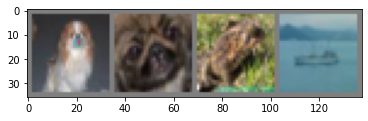

  dog   dog  frog  ship


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [ ]:
print(type(trainloader))
print(images.shape)

<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([4, 3, 32, 32])


###Define a neural network
Khởi tạo một mạng neural network thông qua class net như bên dưới. Hàm tạo __init__() sẽ chứa những layers của class và hàm forward() được sử dụng để ráp nối các layer và trả về một module hoàn chỉnh.

Để hiểu về các layer trong pytorch chúng ta tham khảo tại pytorch layer.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # Conv2d: input nodes, output nodes, kernel size
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


net = Net()

In [ ]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

##Define optimizer function and loss function
Hàm loss function được sử dụng là cross-entropy thông qua class nn.CrossEntropyLoss() và phương pháp optimizer là stochastic gradient descent của module torch.optim. Chi tiết về hàm loss function và phương pháp optimize đã quá quen thuộc, các bạn có thể lên google search một vài bài báo để hiểu rõ.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.1)


##Model training
Chúng ta sẽ khởi tạo một vòng loop bao gồm 2 epochs trong đó mỗi một epochs sẽ truyền toàn bộ các data iterator như đầu vào của mạng nơ ron. Bên trong mỗi epoch chúng ta xác định:

* output của mô hình.
* hàm loss function.
* phương pháp optimize.
* thực hiện quá trình feed forward.

Mọi thứ diễn ra khá đơn giản theo như code bên dưới

In [ ]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs, data is a list of [inputs, labels]
    inputs, labels = data
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %
           (epoch + 1, i + 1, running_loss/2000))
      running_loss = 0.0
      
print('Finished Training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.302
[1,  6000] loss: 2.301
[1,  8000] loss: 2.299
[1, 10000] loss: 2.294
[1, 12000] loss: 2.279
[2,  2000] loss: 2.208
[2,  4000] loss: 2.105
[2,  6000] loss: 2.012
[2,  8000] loss: 1.955
[2, 10000] loss: 1.888
[2, 12000] loss: 1.826
Finished Training


##Test the network on the test data set
Như vậy chúng ta đã hoàn thành 2 lượt huấn luyện dữ liệu trên toàn bộ tập training dataset. Sau đây chúng ta cần kiểm tra xem kết quả mô hình sau huấn luyện như thế nào trên dữ liệu test dataset.



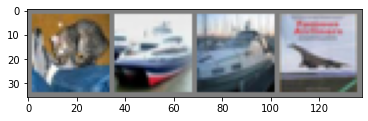

GroundTruth:   cat  ship  ship plane


In [ ]:
# Hiển thị một vài dữ liệu
# Sử dụng hàm iter để biến testloader thành 1 iterator, từ đó có thể lấy các giá trị tiếp theo.
dataiter = iter(testloader)
images, labels = dataiter.next()

# print image
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: {}'.format(' '.join('%5s' % classes[labels[j]] for j in range(4))))

Khác với tensorflow khi dự báo chúng ta cần phải sử dụng hàm predict. Để dự báo nhãn cho tập data test chúng ta chỉ cần truyền raw data vào object net. Mô hình sẽ tự động thực hiện một quá trình lan truyền thuận và tính ra phân phối xác xuất ở đầu ra.



In [ ]:
outputs = net(images)
print(type(outputs))
print(outputs.shape)


<class 'torch.Tensor'>
torch.Size([4, 10])


Lấy ra nhãn dự báo dựa vào xác xuất lớn nhất của phân phối xác xuất đầu ra.



In [ ]:
_,  predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


Dự báo trên 4 quan sát đầu tiên cho thấy đúng 3 sai 1. Kiểm tra trên toàn bộ các quan sát.



In [ ]:
print(type(labels))
print(type(images))

print(labels.shape)
print(images.shape)


<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([4])
torch.Size([4, 3, 32, 32])


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 35 %


Kiểm tra mức độ chính xác trên từng class một.



In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 48 %
Accuracy of   car : 48 %
Accuracy of  bird :  7 %
Accuracy of   cat : 12 %
Accuracy of  deer :  8 %
Accuracy of   dog : 33 %
Accuracy of  frog : 66 %
Accuracy of horse : 50 %
Accuracy of  ship : 27 %
Accuracy of truck : 49 %


## Train model on GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


Để đưa model lên device chúng ta sẽ convert chúng thành parameters và lưu trữ chúng lên buffer của CUDA.



In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
print(data[0].shape)
print(data[1].shape)

torch.Size([4, 3, 32, 32])
torch.Size([4])


In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)


#Documentation
* [Pytorch layer](https://pytorch.org/docs/stable/nn.html)
* [Xây dựng mạng convolutional neural network trên pytorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
* [Dataset pytorch](https://pytorch.org/docs/stable/data.html)
* [Xử lý trên GPU - pytorch](https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html)
* [Pytorch - Buổi 1 - Làm quen với pytorch](https://phamdinhkhanh.github.io/2019/08/10/PytorchTurtorial1.html#39-hu%E1%BA%A5n-luy%E1%BB%87n-model-tr%C3%AAn-gpu)